<a href="https://colab.research.google.com/github/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/6.%20Intro%20al%20aprendizaje%20no%20supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Aprendizaje No Supervisado

* Introducción.
* Principal Components Analysis.
* Clustering.
    * KMeans.
    * Mixture Models.

5to año - Ingeniería en Sistemas de Información

Facultad Regional Villa María

## Introducción

* Los métodos de aprendizaje no supervisado apuntan realizar un análisis _exploratorio_ de los datos, para poder descubrir aspectos de interés sobre los mismos dejando de lado su posible asociación con una respuesta $y$.


* El conjunto de datos que se analiza es la matriz $X$, con el fin de extraer modelos o conocimiento sobre los datos de la misma. Debido a que no incluimos un conjunto $y$ de salidas para aprender iterativamente, para esta tarea se utilizan técnicas distintas.


* No obstante, para ciertos problemas es posible combinar el conocimiento extraído a partir de este tipo de aprendizaje para mejorar los modelos de aprendizaje supervisado vistos anteriormente.


* Algunos ejemplos de tarea de aprendizaje no supervisado:
    * Dada una colección de imágenes, agrupar aquellas similares.
    * Dadas varias fuentes de sonido en una misma pista de audio, como por ejemplo una persona hablando por teléfono y un parlante emitiendo música, obtener la separación de las distintas fuentes.
    * Entender cómo se correlacionan los features de un determinado conjunto de datos.


* En la presente clase vamos a ver la implementación de dos técnicas muy utilizadas: clústering y PCA.

## Análisis de componentes principales (PCA)

* En la práctica, los features $X$ de un dataset suelen tener un grado de relación entre sí (ej. pensar en features edad y altura para una muestra de datos de niños y adolescentes).

* Como muchas veces, para estos datasets con datos correlacionados, es baja la cantidad de features que definen al dataset, debería ser posible encontrar la forma de explicar la mayor parte posible del dataset con la menor cantidad de features posible. 

* El *análisis de componentes principales (PCA)* realiza esto al calcular features transformados que surgen como combinación lineal de los demás, reduciendo así la dimensión del dataset y por ende el efecto de la *Curse of Dimensionality*.

* En otras palabras, PCA apunta a reducir la dimensionalidad de un dataset al considerar qué features explican mejor la varianza de los datos.

* Para ello se crea una proyección linear del dataset. Los datos correlacionados se obtienen mediante un número menor de variables representativas no correlacionadas (ortogonales) que expliquen de forma conjunta la varianza del set original.

### Repaso rápido:

Objetivo: encontrar una matriz de vectores de pesos/coeficientes $W(p,p)$ (cuyos vectores columna se conocen como componentes principales) que transforme a los datos $X(n,p)$ (normalizados con media 0 en cada columna) tal que la nueva transformación maximice la varianza de los datos, mediante

$T = XW$

Cada fila de $T$ representa el mapeo de la correspondiente fila de $X$ para el primer, segundo y último componente principal considerado (hasta un máximo de $min(n,p)$), mientras que cada columna representa los valores de cada observación para el primer componente principal.

En $W$, cada columna/componente tiene los *loadings* del j-ésimo componente principal (con un máximo de $min(n,p)$).

Veamos un ejemplo de su aplicación para el Iris dataset...

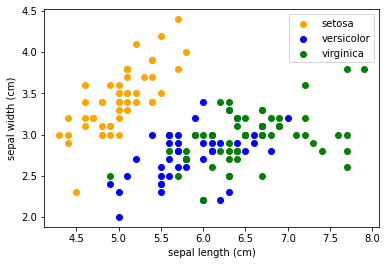

In [1]:
# Recordemos el Iris dataset...

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()

# tomamos los primeros dos features para mostrarlos mejor graficamente (el largo y el ancho del sepalo)
X = iris.data[:, :2]
y = iris.target

plot = plt.scatter(X[y==0, 0], X[y==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X[y==1, 0], X[y==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X[y==2, 0], X[y==2, 1], label=iris.target_names[2], color='green')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best', numpoints=1)
plt.show()

Vamos a obtener los componentes principales mediante varios métodos. Primero, centramos los datos en media 0 (con respecto a cada columna)

In [2]:
# Antes de transformar los datos, los mismos deben estar normalizados
# scale() estandariza los datos con respecto a la media 0
X = iris.data
X_mean = np.mean(X.T, axis=1)
X_norm = X - X_mean

## PCA desde matriz de covarianza

La forma más fácil de computar PCA es computando la matriz de covarianza de X. Descomponiendo esa matriz en autovectores y autovalores, tenemos que los primeros son $W$, y los segundos se corresponden a la varianza explicada.

In [3]:
# la covarianza se calcula como el producto de matrices entre X^T y X
# dividido el número de muestras-1
cov_X = (1/(np.shape(X_norm)[0]-1)) * X_norm.T @ X_norm
autoval, autovec = np.linalg.eig(cov_X)  # descomponemos

In [4]:
# nota: también puede obtenerse la cov mediante numpy, mediante
cov_2_X = np.cov(X_norm.T)

In [5]:
print(autoval) # varianza explicada por cada componente

[4.22824171 0.24267075 0.0782095  0.02383509]


In [6]:
print(autovec) # Componentes de PCA del 1ro al 4to vector

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [7]:
print('Matrix X transformada (primeras 5 filas - covarianza)')
print((X_norm @ autovec)[:5,:])

Matrix X transformada (primeras 5 filas - covarianza)
[[-2.68412563e+00 -3.19397247e-01 -2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00  1.77001225e-01 -2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00  1.44949426e-01  1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00  3.18298979e-01  3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00 -3.26754513e-01  9.00792406e-02 -6.12585926e-02]]


## PCA desde SVD

Otra forma de realizar el análisis es a partir de la descomposición de valores singulares.

In [8]:
# descomponemos X_norm en SVD
# v equivale a W^T
u, s, v = np.linalg.svd(X_norm)
print(v.T) # Componentes de PCA del 1ro al 4to vector

[[ 0.36138659 -0.65658877  0.58202985  0.31548719]
 [-0.08452251 -0.73016143 -0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266 -0.07623608 -0.47983899]
 [ 0.3582892   0.07548102 -0.54583143  0.75365743]]


In [9]:
print('Matrix X transformada (primeras 5 filas - svd)')
print((X_norm @ v.T)[:5,:])

Matrix X transformada (primeras 5 filas - svd)
[[-2.68412563e+00 -3.19397247e-01  2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00  1.77001225e-01  2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00  1.44949426e-01 -1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00  3.18298979e-01 -3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00 -3.26754513e-01 -9.00792406e-02 -6.12585926e-02]]


## PCA desde sklearn

Sklearn usa SVD para realizar PCA, computándolo bajo.

In [10]:
pca = PCA()
pca.fit(X_norm)

# X_transformed son los datos X transformados linealmente con respecto a los componentes principales
X_transformed = pca.transform(X_norm)
print('Matrix X transformada (primeras 5 filas - interfaz sklearn)')
print(X_transformed[:5,:])
# Veamos los vectores de componentes de PCA...
print('Componentes de PCA (W) (ordenados desc. desde el 1° hasta el 4to vector): \n\n', pca.components_.T) 
# Notar que, por la restricción de la ortogonalidad, la máxima
# cantidad de componentes principales es la de los features de X
print('Varianza explicada por cada componente: \n\n', pca.explained_variance_)

Matrix X transformada (primeras 5 filas - interfaz sklearn)
[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]]
Componentes de PCA (W) (ordenados desc. desde el 1° hasta el 4to vector): 

 [[ 0.36138659  0.65658877 -0.58202985 -0.31548719]
 [-0.08452251  0.73016143  0.59791083  0.3197231 ]
 [ 0.85667061 -0.17337266  0.07623608  0.47983899]
 [ 0.3582892  -0.07548102  0.54583143 -0.75365743]]
Varianza explicada por cada componente: 

 [4.22824171 0.24267075 0.0782095  0.02383509]


In [11]:
print('Matrix X transformada (primeras 5 filas - multiplicación a mano)')
print((X_norm @ pca.components_.T)[:5,:])

Matrix X transformada (primeras 5 filas - multiplicación a mano)
[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]]


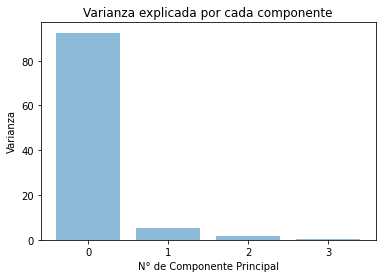

In [12]:
# Visualizamos ahora cuánto es explicada la varianza
# por cada uno de los componentes principales

n_components = np.shape(pca.components_)[1]

y_pos = np.arange(n_components)
# pca.explained_variance_ratio_ es quien nos devuelve el gráfico de la varianza
plt.bar(y_pos, np.round(100 * pca.explained_variance_ratio_,
                        decimals=1), align='center', alpha=0.5)
plt.xticks(y_pos, np.arange(0, n_components))
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

* ¿Qué significa esto? Significa que el primer componente principal que generamos explica más de un 90% de la varianza de los datos. En otras palabras, **al usar una varible (transformada) para graficar tenemos el 90% de la información acerca de los features que representan las 4 variables originales**.

* Notar que un componente principal es una combinación lineal de los valores de los distintos features; **no confundir el número del componente principal con el número de feature, cada feature transformado "resume info" de varios features**.

* Veamos esto gráficamente...

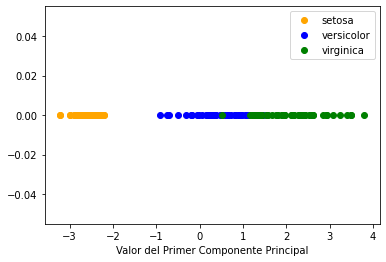

In [13]:
plt.plot(X_transformed[y==0,0], np.zeros(len(X_transformed[y==0,0])), 'o', label=iris.target_names[0], color='orange')
plt.plot(X_transformed[y==1,0], np.zeros(len(X_transformed[y==1,0])), 'o', label=iris.target_names[1], color='blue')
plt.plot(X_transformed[y==2,0], np.zeros(len(X_transformed[y==2,0])), 'o', label=iris.target_names[2], color='green')
plt.xlabel('Valor del Primer Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()


Incluimos el segundo componente principal, vemos que no cambia sustancialmente...

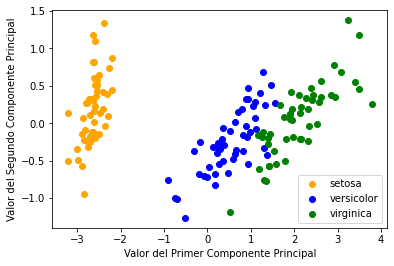

In [14]:
plot = plt.scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X_transformed[y==1, 0], X_transformed[y==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X_transformed[y==2, 0], X_transformed[y==2, 1], label=iris.target_names[2], color='green')
plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

Agregamos los loading vectors de cada feature para ver cómo los mismos varian segun el valor de los 2 primeros componentes...

(parte del codigo basado en https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib)

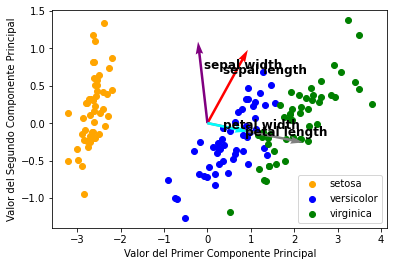

In [15]:
# codigo agregado para graficar los vectores
V = np.array([[pca.components_[0,0],pca.components_[1,0]],
              [pca.components_[0,1],pca.components_[1,1]],
              [pca.components_[0,2],pca.components_[1,2]],
              [pca.components_[0,3],pca.components_[1,3]]])
origin = [0,0,0,0],[0,0,0,0] # origen, desde donde se situaran los vectores

plot = plt.scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], label=iris.target_names[0], color='orange')
plot = plt.scatter(X_transformed[y==1, 0], X_transformed[y==1, 1], label=iris.target_names[1], color='blue')
plot = plt.scatter(X_transformed[y==2, 0], X_transformed[y==2, 1], label=iris.target_names[2], color='green')

# notar que los vectores están agrandados a modo de mejor visualización
plt.quiver(*origin, V[:,0], V[:,1], color=['r','purple','grey','cyan'], scale=3)

# se agrega texto a los vectores, quitando el substring " (cm)"
plt.text(pca.components_[0,0],pca.components_[1,0], iris.feature_names[0].replace(' (cm)', ''), fontsize=12, weight=1000)
plt.text(pca.components_[0,1],pca.components_[1,1], iris.feature_names[1].replace(' (cm)', ''), fontsize=12, weight=1000)
plt.text(pca.components_[0,2],pca.components_[1,2], iris.feature_names[2].replace(' (cm)', ''), fontsize=12, weight=1000)
plt.text(pca.components_[0,3],pca.components_[1,3], iris.feature_names[3].replace(' (cm)', ''), fontsize=12, weight=1000)
plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

Por ejemplo, podemos ver intuitivamente que el vector del feature "ancho del sépalo" (**"sepal width"**) crece en mayor proporción a medida que crece el segundo componente principal, mientras que también crece (pero en menor medida) de forma inversamente proporcional al valor del primer componente principal (es decir, cuando el mismo decrece).

Algunas utilidades de PCA

1. Buena forma de visualización de los datos, al poder apreciar cómo los features están correlacionados con las distintas observaciones.

2. Reducción de la dimensionalidad: por ejemplo, si quisiéramos hacer un clasificador en un dataset muy grande y vemos que sólo unos pocos features transformados de una cantidad mucho mayor explican casi toda la varianza, es menos exigente computacionalmente transformar los datos y hacer la predicción en esas pocas dimensiones transformadas que utilizar el dataset original, además de obtener mejores modelos con una mínima pérdida de precisión.

Naturalmente, esto último sólo es aplicable cuando existen algunos features transformados que casi no explican la varianza. No es conveniente utilizar PCA en el caso que la pérdida de información no amerite el beneficio de reducir la dimensionalidad si la varianza se encuentra mucho más equitativamente distribuída. Tampoco es conveniente aplicar la reducción cuando el dataset es de cierto tamaño, debido al costo de las operaciones con matrices.

Si utilizamos PCA para un conjunto $X_{train}$ y hacemos un modelo para aproximar el mismo, ¿qué hacemos si tenemos nuevos datos de test $X_{test}$?

* Para los nuevos datos tenemos primero que **normalizarlos** restándole a cada feature la media del feature para el conjunto de entrenamiento y dividirlo por la desviación estándar de dicho conjunto (en el caso de utilizar z-score standarization).

* Tras eso, **deben ser transformados** con respecto a los componentes principales del conjunto de entrenamiento con **_pca.transform($X_{test}$)_**. A partir de ahí ya pueden ser utilizados con el modelo empleado para el conjunto $X$.

Por otra parte, nuestro dataset transformado puede ser devuelto a la matriz con los predictores originales con el método **pca.inverse_transform(X_transformed)**, quedando exactamente el mismo dataset que X si no se realizó ninguna modificación, y variando si alguna modificación fue realizada (por ejemplo, eliminar un feature de un componente principal que casi no aportaba a la explicación de la varianza se traduciría en una muy ligera variación en el dataset original).

## Clustering

* _Clustering_ se refiere a aquellos métodos que separan un conjunto de datos $X$ en subgrupos (_clústers_), de tal forma que los datos pertenecientes a cada grupo tengan entre sí la mayor relación posible.
* Dado que no consideramos las etiquetas $y$, estos grupos se infieren exclusivamente a partir de los features de nuestra matriz de datos $X$.
* Para entender clustering, es posible interpretarlo como un método que le asigna un vector similar a un label a cada observación de $X$, donde cada una de las ocurrencias de dicho vector representa el clúster de la correspondiente observación.

### K-Means Clustering

K-Means Clustering es un método iterativo y de propósito general muy simple que particiona las observaciones en un número predefinido $K$ de clústers.

* Cada uno de los datos será asignado a un y sólo un cluster.
* Funciona según el siguiente algoritmo:

Algoritmo: Dado un número K de clústers predefinido

1. Definir aleatoriamente cada uno de los $K$ centroides de cada uno de los $\{1,2,...,K\}$ clústers. El centroide es el vector promedio de cada uno de los vectores fila asignados al mismo clúster, excepto en el primer paso en donde se utilizan centroides aleatorios.
2. Repetir (hasta que no haya cambios en los clústers asignados)
    1. Asignar cada observación al clúster en donde algún centroide se encuentra más cerca (por distancia Euclideana).
    2. Calcular el centroide para cada uno de los $K$ clústers y reemplazar los nuevos centroides por los anteriores.
    
(Recordemos que un centroide o centro geométrico dado un conjunto de puntos es la posición "promedio" de los puntos, como ocurre con el punto central de la siguiente figura)

![](images/5/triangle_centroid.png)

Analíticamente:

Dados los vectores fila $X_1, X_2, \dots, X_n$, el vector centroide estará dado por

$$X_{centroide} = \frac{1}{n} (X_1 + X_2 + \dots + X_n)$$

Gráficamente...

![](images/5/k_means_example.png)

* Veamos cómo funciona el algoritmo K-Means en el iris dataset.
* Este es un ejemplo en el cuál no tiene mucho sentido hacer clústering debido a que tenemos los labels $y$, pero dado que es un conjunto conocido vamos a ver cómo convergen los distintos clústers.

Número de clúster asignado a cada observación  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Centroides de cada clúster  [[5.84333333 3.05733333 3.758      1.19933333]]


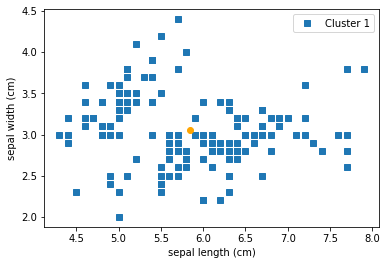

Número de clúster asignado a cada observación  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Centroides de cada clúster  [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


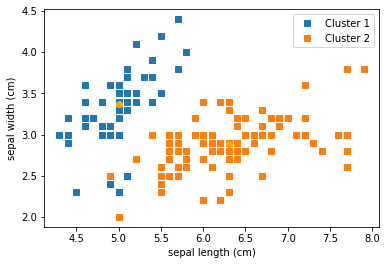

Número de clúster asignado a cada observación  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Centroides de cada clúster  [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


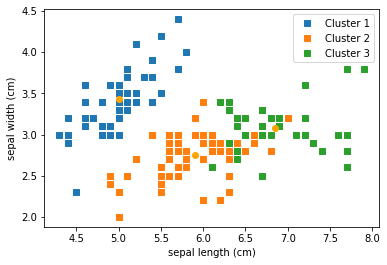

Número de clúster asignado a cada observación  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 2 0]
Centroides de cada clúster  [[6.2525     2.855      4.815      1.625     ]
 [5.006      3.428      1.462      0.246     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]


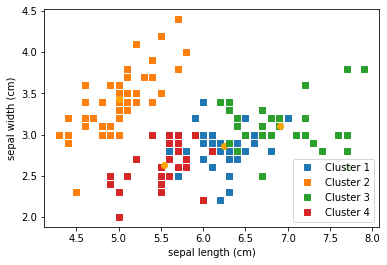

In [16]:
from sklearn.cluster import KMeans

for number_of_cluster in range(4):
    
    kmeans = KMeans(n_clusters=number_of_cluster+1, random_state=80)
    kmeans.fit(X)

    print("Número de clúster asignado a cada observación ", kmeans.labels_)
    print("Centroides de cada clúster ", kmeans.cluster_centers_)

    for i in range(np.max(kmeans.labels_)+1):
        plt.plot(X[kmeans.labels_==i,0], X[kmeans.labels_==i,1], 's', label="Cluster " + str(i+1))
        plt.plot(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 'o', color='orange')

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend(loc='best', numpoints=1)
    plt.show()

* Ejemplo de problema con KMeans (basado en http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html)...

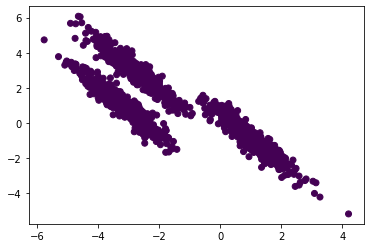

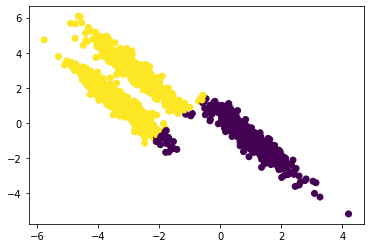

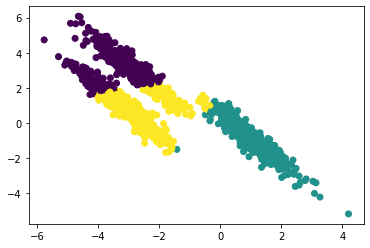

In [17]:
import numpy as np
from sklearn.datasets import make_blobs

for number_of_cluster in range(3):

    # Creamos las tres "manchas" que forman nuestros datos para reflejar este ejemplo
    n_samples = 1500
    X, y = make_blobs(n_samples=n_samples, random_state=170)
    transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X_aniso = np.dot(X, transformation)

    # Ajustamos nuestros datos a un modelo KMeans. Vemos lo que pasa cuando cambia el número de clústers
    km = KMeans(n_clusters=number_of_cluster+1, random_state=170)
    km.fit(X_aniso)
    km_pred = km.predict(X_aniso)

    plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=km_pred)
    plt.show()

#### Mixture Models

Los _Mixture Models_ son una variante de **Expectation Maximization** (EM), que son una familia de algoritmos empleados para encontrar parámetros desconocidos en modelos estadísticos. Muy simplificadamente EM en K-means se divide en los siguientes pasos:

* El **Expectation step** (E), donde se asigna cada observación al clúster más probable de acuerdo a una distribución dada con sus respectivos parámetros.
* El **Maximization step** (M), donde se optimizan los parámetros dadas las asignaciones realizadas en E, maximizando su **likelihood function** (muy simplificadamente, es una función que asigna una probabilidad a un evento dados sus parámetros estadísticos).
* Dada una semilla inicial, EM itera sucesivamente hasta que se alcanza estabilidad entre los pasos E-M (es decir que no cambian los parámetros / datos inferidos).

En los MM, se asume que los datos generados vienen de una **mezcla (_mixture_) de distribuciones probabilísticas de la misma familia (ej: Gaussianas) pero con distintos parámetros**. En nuestro ejemplo nos vamos a centrar en _Mixture of Gaussians_.

* Mixture of Gaussians puede ser pensado simplificadamente como una "generalización del KMeans" en donde se asume que los **centroides son formados a partir de distribuciones normales, además de incorporar información sobre la varianza de los datos**.
* Veamos cómo los mismos logran separar mucho mejor los datos de nuestro último ejemplo.

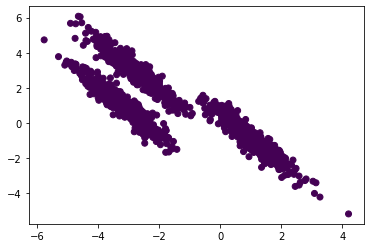

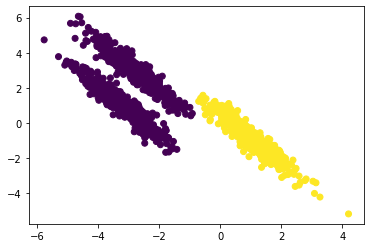

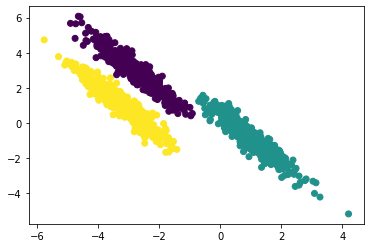

In [18]:
from sklearn import mixture

for number_of_component in range(3):

    # Ajustamos nuestros datos a un modelo Mixture of Gaussians
    gmm = mixture.GaussianMixture(n_components=number_of_component+1)
    gmm.fit(X_aniso)
    gmm_pred = gmm.predict(X_aniso)

    plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_pred)
    plt.show()

### Conclusiones de la introducción al aprendizaje no supervisado

* El aprendizaje no supervisado es una forma de aprendizaje donde el foco está centrado en extraer conocimiento sobre los datos con los que contamos, sin considerar la salida de los mismos.
* Hemos visto los dos enfoques principales: PCA y clustering.
* Con PCA, tomamos un dataset y, a partir de una transformación lineal, vemos cuán correlacionados están sus datos al contar con vectores ortogonales que los transforman.
* Con clustering, lo que hacemos es ver cómo los datos pueden dividirse en subgrupos, de modo tal que podamos entender mejor las propiedades subyacentes de los features.

Ambos enfoques nos sirven para obtener conocimiento desde una perspectiva distinta de la propuesta por las técnicas de aprendizaje supervisado.

Bonus:

* Visión general sobre cuándo usar qué métodos de Aprendizaje No Supervisado y Supervisado: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html